## 1. INTRODUCCIÓN

Diccionario de datos:

- customerID: número de identificación único de cada cliente
- Churn: si el cliente dejó o no la empresa
- gender: género (masculino y femenino)
- SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- Partner: si el cliente tiene o no una pareja
- Dependents: si el cliente tiene o no dependientes
- tenure: meses de contrato del cliente
- PhoneService: suscripción al servicio telefónico
- MultipleLines: suscripción a más de una línea telefónica
- InternetService: suscripción a un proveedor de internet
- OnlineSecurity: suscripción adicional de seguridad en línea
- OnlineBackup: suscripción adicional de respaldo en línea
- DeviceProtection: suscripción adicional de protección del dispositivo
- TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
- StreamingTV: suscripción de televisión por cable
- StreamingMovies: suscripción de streaming de películas
- Contract: tipo de contrato
- PaperlessBilling: si el cliente prefiere recibir la factura en línea
- PaymentMethod: forma de pago
- Charges.Monthly: total de todos los servicios del cliente por mes
- Charges.Total: total gastado por el cliente

## 2. LIMPIEZA Y TRATAMIENTO DE DATOS

In [98]:
# Importación de librerías a utilizar en el proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
# Importacion de la base de datos

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

datos = pd.read_json(url)

# Mostrar las primeras 5 filas del df
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


- Se observa que al ser importado el archivo json, se han generado columnas con diccionarios anidados, por lo que se tendrá que normalizarlas para poder estructurar mejor el dataframe y así poder analizarlo.

In [100]:
# Lista de columnas anidadas para normalizar
columnas_anidadas = ['customer', 'phone', 'internet', 'account']

# Separar las columnas no anidadas
otras_columnas = datos.drop(columns=columnas_anidadas)

# Normalizar cada columna anidada
dfs_normalizados = [
    pd.json_normalize(datos[col]).add_prefix(f'{col}_')
    for col in columnas_anidadas
]

# Concatenar todo en un solo DataFrame
datos_normalizados = pd.concat([otras_columnas] + dfs_normalizados, axis=1)


In [101]:
# Visualización de dataframe normalizado
datos_normalizados.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


- El dataframe ha sido normalizado y se pueden observar todas las columnas individuales con sus datos.
- Se realizará una exploración de los datos para conocer el dataframe y saber si requiere algún tipo de limpieza.

In [102]:
# Visualización de información general de dataframe
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [103]:
# Visualización de datos descriptivos de las columnas numéricas del df
datos_normalizados.describe()

,customer_SeniorCitizen,customer_tenure,account_Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [104]:
# Visualización del conteo de valores únicos por cada columna del df
for col in datos_normalizados.columns:
    print(datos_normalizados[col].value_counts())
    print('--')

customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64
--
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
--
customer_gender
Male      3675
Female    3592
Name: count, dtype: int64
--
customer_SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64
--
customer_Partner
No     3749
Yes    3518
Name: count, dtype: int64
--
customer_Dependents
No     5086
Yes    2181
Name: count, dtype: int64
--
customer_tenure
1     634
72    369
2     246
3     207
4     185
     ... 
28     60
39     59
44     54
36     50
0      11
Name: count, Length: 73, dtype: int64
--
phone_PhoneService
Yes    6560
No      707
Name: count, dtype: int64
--
phone_MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64
--
internet_InternetService
Fiber optic    3198
D

- La columna account_Charges.Total está como tipo object, debe ser cambiada a tipo float.
- En la columna 'Churn' hay 224 valores vacíos.
- En las columnas categóricas no se observa errores de escritura que ocasionen categorías repetidas.
- La columna 'CustomerID' no es relevante para el análisis de la evasión.

### 2.1 Cambio de tipo de datos
Se cambiará el tipo de datos de la columna 'account_Charges.Total' de object a float64, ya que esta columna almacena datos de dinero.

In [105]:
# Realizar una copia del dataframe normalizado para hacer todos los cambios
df_final = datos_normalizados.copy()

# Cambiar el tipo de dato de object a numeric(float)
df_final['account_Charges.Total'] = pd.to_numeric(df_final['account_Charges.Total'], errors='coerce')

In [106]:
# Verificar las estadísticas descriptivas de la columna
df_final['account_Charges.Total'].describe()

count    7256.000000
mean     2280.634213
std      2268.632997
min        18.800000
25%       400.225000
50%      1391.000000
75%      3785.300000
max      8684.800000
Name: account_Charges.Total, dtype: float64

### 2.2 Eliminación de valores vacíos en la columna 'Churn'
En la columna 'Churn' se encontraron 224 valores vacíos, que deben ser eliminados. Como el presente proyecto tiene como objetivo analizar las causas del abandono de clientes, y la cantidad de datos vacíos (224) es poca comparada con la cantidad total de los datos (7256), se eliminarán dichas filas que no tienen información sobre si el cliente dejó o no la empresa.

In [107]:
# Eliminar filas en las que el valor de 'Churn' es vacío
df_final = df_final[df_final['Churn'] != '']

In [108]:
# Verificación de la eliminación de las filas vacías
df_final['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### 2.3 Eliminación de columnas
Se eliminará la columna customerID, que no es relevante para el análisis del abandono de clientes en la empresa, ya que solo contiene códigos asigdanos a cada uno de los clientes.

In [109]:
# Eliminación de la columna CustomerID
df_final = df_final.drop(columns='customerID')

In [110]:
# Verificación de la eliminacion de la columna
df_final.columns

Index(['Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Monthly', 'account_Charges.Total'],
      dtype='object')

### 2.4 Renombrar columnas
Se renombrarán las columnas para poder estandarizar el formato de los nombres

In [111]:
# Diccionario con nombres a cambiar

nombres_nuevos = {
                'Churn':'churn',
                'customer_gender':'cust_gender',
                'customer_SeniorCitizen':'cust_senior_citizen',
                'customer_Partner':'cust_partner', 
                'customer_Dependents':'cust_dependents', 
                'customer_tenure':'cust_tenure',
                'phone_PhoneService':'phone_service', 
                'phone_MultipleLines':'phone_multiple_lines', 
                'internet_InternetService':'internet_service',
                'internet_OnlineSecurity':'online_security', 
                'internet_OnlineBackup':'online_backup',
                'internet_DeviceProtection':'device_protection', 
                'internet_TechSupport':'tech_support',
                'internet_StreamingTV':'streaming_tv', 
                'internet_StreamingMovies':'streaming_movies', 
                'account_Contract':'contract_type',
                'account_PaperlessBilling':'paperless_billing', 
                'account_PaymentMethod':'payment_method',
                'account_Charges.Monthly':'monthly_charges', 
                'account_Charges.Total':'total_charges'
                
}

In [112]:
# Renombrar los nombres de las columnas
df_final.rename(columns=nombres_nuevos, inplace=True)

In [113]:
# Verificación de columnas renombradas
df_final.columns

Index(['churn', 'cust_gender', 'cust_senior_citizen', 'cust_partner',
       'cust_dependents', 'cust_tenure', 'phone_service',
       'phone_multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract_type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

### 2.5 Creación de columna daily_charges
De acuerdo a la recomendación indicada en el challenge, se creará la columna daily_charges, que tendrá los valores diarios de facturación.

In [114]:
# Creación de la columna daily_charges
df_final['daily_charges'] = round(df_final['monthly_charges'] / 30, 2)

In [115]:
# Verificación de la creación de la columna daily_charges
df_final.head()

,churn,cust_gender,cust_senior_citizen,cust_partner,cust_dependents,cust_tenure,phone_service,phone_multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_method,monthly_charges,total_charges,daily_charges
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


### 2.6 Cambio de variables categóricas a variables numéricas
Las columnas 'churn', 'cust_gender', 'cust_partner', 'cust_dependents', 'phone_service' y 'paperless_billing' tienen valores categóricos que pueden ser cambiados a valores 0 y 1. Los cambios a realizar serán los siguientes:
- En las columnas 'churn', 'cust_partner', 'cust_dependents', 'phone_service' y 'paperless_billing' se dará un valor de 0 = 'No' y 1 = 'Yes'.
- En la columna 'cust_gender', se dará un valor de 0 = 'female' y 1 = 'male'

In [116]:
# Columnas a modificar
columnas_si_no = ['churn', 'cust_partner', 'cust_dependents', 'phone_service', 'paperless_billing']

In [117]:
# Cambio de tipo de dato en columnas seleccionadas con valores Yes/No

for col in columnas_si_no:
    df_final[col] = df_final[col].replace({'No':0, 'Yes':1})
    df_final[col].astype(int)

C:\Users\ecord\AppData\Local\Temp\ipykernel_9912\2552431760.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final[col] = df_final[col].replace({'No':0, 'Yes':1})
C:\Users\ecord\AppData\Local\Temp\ipykernel_9912\2552431760.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final[col] = df_final[col].replace({'No':0, 'Yes':1})
C:\Users\ecord\AppData\Local\Temp\ipykernel_9912\2552431760.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, 

In [118]:
# Cambio de tipo de dato en columnas seleccionadas con valores Female/Male

df_final['cust_gender'] = df_final['cust_gender'].replace({'Female':0, 'Male':1}).astype(int)

C:\Users\ecord\AppData\Local\Temp\ipykernel_9912\4271235602.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final['cust_gender'] = df_final['cust_gender'].replace({'Female':0, 'Male':1}).astype(int)


In [119]:
# Verificación de cambios
df_final.head()

,churn,cust_gender,cust_senior_citizen,cust_partner,cust_dependents,cust_tenure,phone_service,phone_multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_method,monthly_charges,total_charges,daily_charges
0,0,0,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0,1,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,1,1,0,0,0,4,1,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,1,1,1,1,0,13,1,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,1,0,1,1,0,3,1,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [120]:
# Verificación de cambios
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   churn                 7043 non-null   int64  
 1   cust_gender           7043 non-null   int64  
 2   cust_senior_citizen   7043 non-null   int64  
 3   cust_partner          7043 non-null   int64  
 4   cust_dependents       7043 non-null   int64  
 5   cust_tenure           7043 non-null   int64  
 6   phone_service         7043 non-null   int64  
 7   phone_multiple_lines  7043 non-null   object 
 8   internet_service      7043 non-null   object 
 9   online_security       7043 non-null   object 
 10  online_backup         7043 non-null   object 
 11  device_protection     7043 non-null   object 
 12  tech_support          7043 non-null   object 
 13  streaming_tv          7043 non-null   object 
 14  streaming_movies      7043 non-null   object 
 15  contract_type         7043

### 2.7 Modificación de la columna internet_service a internet_type
La columna internet_service indica el tipo de conexión a internet que tiene el clientte (DSL o fibra óptica), por lo que se cambiará de nombre a internet_type para describir mejor su contenido. Las filas que tengan 'No' se cambiarán a 'No internet service'.

In [121]:
# Valores actuales de la columna internet_service
df_final['internet_service'].value_counts()

internet_service
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [122]:
# Cambio de nombre de columna internet_service
df_final.rename(columns={'internet_service':'internet_type'}, inplace=True)

In [123]:
# Verificación del renombre de la columna
df_final.columns

Index(['churn', 'cust_gender', 'cust_senior_citizen', 'cust_partner',
       'cust_dependents', 'cust_tenure', 'phone_service',
       'phone_multiple_lines', 'internet_type', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract_type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'daily_charges'],
      dtype='object')

In [124]:
# Cambio de dato en las filas donde internet_type = 'No'
df_final['internet_type'] = df_final['internet_type'].replace('No', 'No internet service')

In [125]:
# Verificación de cambio de datos en la columna internet_type
df_final['internet_type'].value_counts()

internet_type
Fiber optic            3096
DSL                    2421
No internet service    1526
Name: count, dtype: int64

Los conteos de los valores antes y después del cambio no han sido alterados.

### 2.8 Creación de columna internet_service
Se creará la columna internet_service que tenga valores 1 = 'Yes' y 0 ='No' de acuerdo a los valores correspondientes en la columna internet_type:
- Cuando el valor de internet_type sea 'Fiber optic' o 'DSL', el valor de la columna internet_service será 1.
- Cuando el valor de internet_type sea 'No internet service', el valor de la columna internet_service será 0.

En el dataframe, la columna internet_service será ubicada antes de la columna internet_type.

In [126]:
# Creación de la columna internet_service y sus valores
df_final['internet_service'] = np.where(df_final['internet_type'] == 'No internet service', 0, 1)


In [127]:
# Verificación de valores dentro de la columna internet_service
df_final['internet_service'].value_counts()

internet_service
1    5517
0    1526
Name: count, dtype: int64

Los valores 1 y 0 coinciden con los valores de la columna internet_type, según lo establecido.

In [128]:
# Cambiar de lugar la columna internet_service

nombre_columna = df_final.columns[-1]
col_int_service = df_final.pop(nombre_columna)
df_final.insert(8,nombre_columna, col_int_service)

In [129]:
# Verificación de reposicionamiento de columna internet_service
df_final.head()

,churn,cust_gender,cust_senior_citizen,cust_partner,cust_dependents,cust_tenure,phone_service,phone_multiple_lines,internet_service,internet_type,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_method,monthly_charges,total_charges,daily_charges
0,0,0,0,1,1,9,1,No,1,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0,1,0,0,0,9,1,Yes,1,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,1,1,0,0,0,4,1,No,1,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,1,1,1,1,0,13,1,No,1,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,1,0,1,1,0,3,1,No,1,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [131]:
# Reseteo del index
df_final.reset_index(inplace=True)

In [132]:
# Verificacion del dataframe final
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 7043 non-null   int64  
 1   churn                 7043 non-null   int64  
 2   cust_gender           7043 non-null   int64  
 3   cust_senior_citizen   7043 non-null   int64  
 4   cust_partner          7043 non-null   int64  
 5   cust_dependents       7043 non-null   int64  
 6   cust_tenure           7043 non-null   int64  
 7   phone_service         7043 non-null   int64  
 8   phone_multiple_lines  7043 non-null   object 
 9   internet_service      7043 non-null   int64  
 10  internet_type         7043 non-null   object 
 11  online_security       7043 non-null   object 
 12  online_backup         7043 non-null   object 
 13  device_protection     7043 non-null   object 
 14  tech_support          7043 non-null   object 
 15  streaming_tv         

En esta primera etapa se ha concluido la limpieza de datos, en la que se eliminaron valores faltantes, se creó la columna daily_charges, se renombraron las columnas y se imputaron valores numéricos a las variables categóricas dicotómicas identificadas.
Con el dataframe final listo se procederá a realizar el análisis exploratorio de datos.

## 3. ANÁLISIS EXPLORATORIO DE DATOS


Esta etapa se centrará en realizar un análisis para poder determinar los factores que han influido en el abandono de clientes. Las principales preguntas a responder son las siguientes:

- ¿Cuáles son los servicios más populares entre los clientes?
- ¿Cuál es la tasa de abandono de clientes?
- ¿Qué perfil tiene el cliente que abandona el servicio?
- ¿Es el costo del servicio un factor importante para que un cliente abandone?
- ¿Qué tipo de servicios contrataban los clientes que abandonaron?


### 3.1 ¿Cuáles son los servicios más populares entre los clientes?
Se realizará un análisis de cantidad de clientes por servicio y cantidad de abandonos por servicio. Los servicios principales de la empresa son el servicio de telefonía y el servicio de internet. Cada uno de estos servicios tiene sub-servicios ofertados:

1. Servicio de telefonía (phone_service):
    - 1 sola línea telefónica
    - Múltiples líneas telefónicas (phone_multiple_lines)

2. Servicio de internet (internet_service):
    - Tipo de conexión a internet (internet_type)
    - Seguridad en línea (online_security)
    - Respaldo en línea (online_backup)
    - Protección de dispositivo (device_protection)
    - Servicio técnico (tech_support)
    - TV cable (streaming_tv)
    - Películas streaming (streaming_movies)


In [31]:
# Crear un dataframe de loser servicios
clientes_servicio = df_final[['churn','phone_service', 'phone_multiple_lines', 'internet_service', 'internet_type', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']]
clientes_servicio.head()

,churn,phone_service,phone_multiple_lines,internet_service,internet_type,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,No,Yes,No,Yes,DSL,No,Yes,No,Yes,Yes,No
1,No,Yes,Yes,Yes,DSL,No,No,No,No,No,Yes
2,Yes,Yes,No,Yes,Fiber optic,No,No,Yes,No,No,No
3,Yes,Yes,No,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Yes,Yes,No,Yes,Fiber optic,No,No,No,Yes,Yes,No


In [32]:
# Conteo de clientes por servicio (valores = 'Yes')
columnas_servicios = ['phone_service', 'phone_multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']
conteo = (clientes_servicio[columnas_servicios] == 'Yes').sum()
conteo

phone_service           6361
phone_multiple_lines    2971
internet_service        5517
online_security         2019
online_backup           2429
device_protection       2422
tech_support            2044
streaming_tv            2707
streaming_movies        2732
dtype: int64

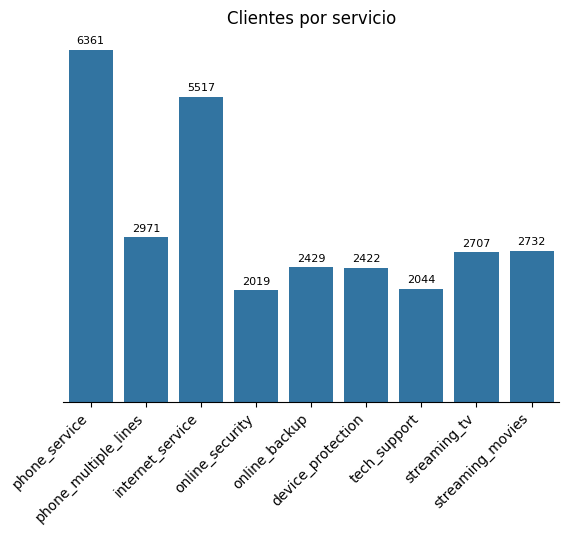

In [33]:
# Realizar el gráfico de clientes por servicio
fig, ax = plt.subplots()

sns.barplot(x=conteo.index, y=conteo)
ax.set_title('Clientes por servicio')

# Adicionar valores de las columnas
for i in range(0, len(conteo)):
    ax.text(x=conteo.index[i], y=conteo.iloc[i] + 100, s=conteo.iloc[i], ha = 'center', fontsize = 8)

# Eliminar marco superior, derecho e izquierdo y valores del eje y
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.yaxis.set_ticks([])

# Rotar las etiquetas del eje x en 45°
plt.xticks(rotation=45, ha='right')

# Quitar etiquetas de los ejes x e y
ax.set(xlabel=None, ylabel=None)

# Mostrar el gráfico
plt.show()

## 4. CONCLUSIONES

## 5. RECOMENDACIONES

- Tener información sobre quejas de los clientes o índice de satisfacción de los servicios.
- ¿Programa de fidelización / descuentos a los clientes con mayor tiempo?